<a href="https://colab.research.google.com/github/YorkJong/Colab/blob/main/ViStock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualizing Stock Prices and Volumes


## Installing Required Packages

### Install yfinance

In [1]:
%pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 8.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

### Install mplfinance

In [3]:
%pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 3.0 MB/s eta 0:00:00


### Install TA-Lib

In [ ]:
import platform

if platform.system() == "Linux":
    # for Colab
    !wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
    !tar -xzvf ta-lib-0.4.0-src.tar.gz
    %cd ta-lib
    !./configure --prefix=/usr
    !make
    !make install
elif platform.system() == "Darwin":
    # for macOS
    !brew install ta-lib

%pip install Ta-Lib

#### References:
* [用 Python 快速計算 158 種技術指標！](https://medium.com/ai股仔/用-python-快速計算-158-種技術指標-26f9579b8f3a)

## Pandas


In [ ]:
import pandas as pd
import yfinance as yf
import pandas as pd
from datetime import datetime

# Download stock data
ticker = "TSLA"
df = yf.Ticker(ticker).history(period="6mo")    # for last 6 month
#df = yf.download(ticker, start="2022-06-01")
#df = yf.download(ticker, start="2021-07-01", end="2022-01-31")
#df = yf.Ticker(ticker).history(period="max")

#print(type(df.index))
#print(df.tail())
#print(df.tail())

# Save the data to a CSV file
df.to_csv("tesla_stock.csv")

# Load the data from the file
df = pd.read_csv("tesla_stock.csv")
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df.set_index('Date', inplace=True)

#df.reset_index(inplace=True)    # index is 0..N now
#print(df.tail())
#df.set_index('Date')
#df.index = pd.to_datetime(df.index.values, utc=True)

#df.index = pd.to_datetime(df.index.values, format='%Y-%m-%d %H:%M:%S', utc=True)
print(type(df.index))
print(type(df.index.values[0]))
#df.index = df.index.strftime('%Y-%m-%d')
#df.index.values[:] = [d[:len('YYYY-mm-dd')] for d in df.index.values]
#df.set_index('Date')
#print(df.head())
#df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')
#df.index = pd.to_datetime(df.index, format='%Y-%m-%d %H:%M:%S')
#print(type(df.index))
#df.reset_index(inplace=True)    # index is 0..N now
#print(df.columns)
#print(df.index.size)
df.tail()

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'numpy.datetime64'>


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-30 05:00:00+00:00,178.050003,179.770004,166.500000,166.660004,230878800,0.0,0.0
2023-01-31 05:00:00+00:00,164.570007,174.300003,162.779999,173.220001,196813500,0.0,0.0
2023-02-01 05:00:00+00:00,173.889999,183.809998,169.929993,181.410004,213806300,0.0,0.0
2023-02-02 05:00:00+00:00,187.330002,196.750000,182.610001,188.270004,217448300,0.0,0.0
2023-02-03 05:00:00+00:00,183.949997,199.000000,183.690002,189.979996,231684200,0.0,0.0


#### References:
* [[Day09]Pandas索引的運用！](https://ithelp.ithome.com.tw/articles/10194006)


## mplfinance -- a matplotlib finance API to create financial plots

### Show a 3-split (price, volume, RSI) stock chart (using mplfinance with TA-Lib)

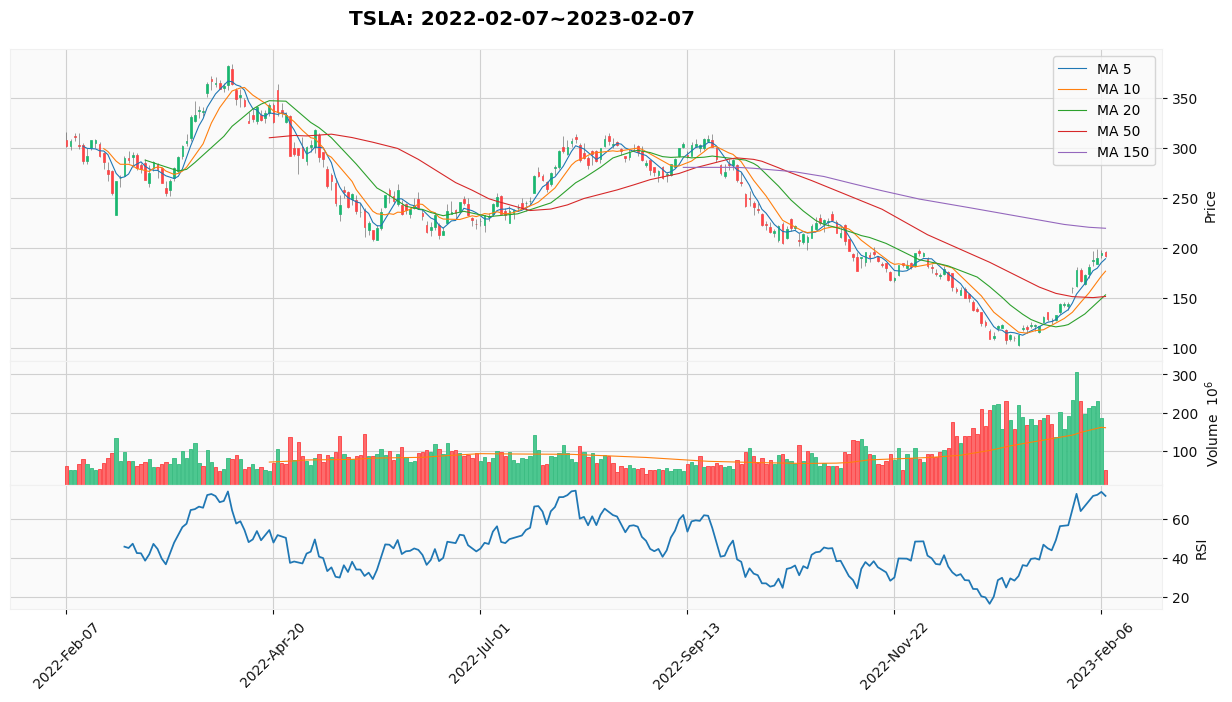

In [20]:
#@title _
ticker = "TSLA" #@param {type:"string"}
period = "12mo" #@param ["3mo", "6mo", "12mo", "24mo"]
"""
Show a 3-split (price, volume, RSI) stock chart.
* Data from yfinance
* Plot with mplfinance
* RSI from TA-Lib
"""
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf
from talib import abstract


# Download stock data
df = yf.Ticker(ticker).history(period=period)

# list days of moving average lines
ma_days = (5, 10, 20, 50, 150)

# Add Volume Moving Average
vma = mpf.make_addplot(df['Volume'], type='line', linestyle='', panel=1, mav=50)

# Add RSI
RSI = lambda df, period: abstract.RSI(df, timeperiod=period)
rsi = mpf.make_addplot(RSI(df['Close'], 14), panel=2, ylabel='RSI')

# Plot candlesticks MA, volume, volume MA, RSI
fig, axes = mpf.plot(
    df, type='candle', mav=ma_days,     # candlestick and MA 
    volume=True, addplot=[vma, rsi],    # volume, volume MA, RSI
    style='yahoo', figsize=(16, 8),
    returnfig=True
)
axes[0].legend([f'MA {d}' for d in ma_days], loc='upper right')
df.index = df.index.strftime('%Y-%m-%d')
fig.suptitle(f"{ticker}: {df.index.values[0]}~{df.index.values[-1]}", y=0.93)

# Show
mpf.show()  # plt.show()


#### References:
* [如何利用 Python 金融分析可視化模組 mplfinance 繪製比特幣 K 線圖及財務指標？](https://www.grenade.tw/blog/how-to-use-the-python-financial-analysis-visualization-module-mplfinance/)
* [Python 學習筆記 : 用 mplfinance 套件繪製金融圖表 (一)](https://yhhuang1966.blogspot.com/2022/09/python-mplfinance.html)


### Show a stock Volume Profile (2 split; using mplfinance)

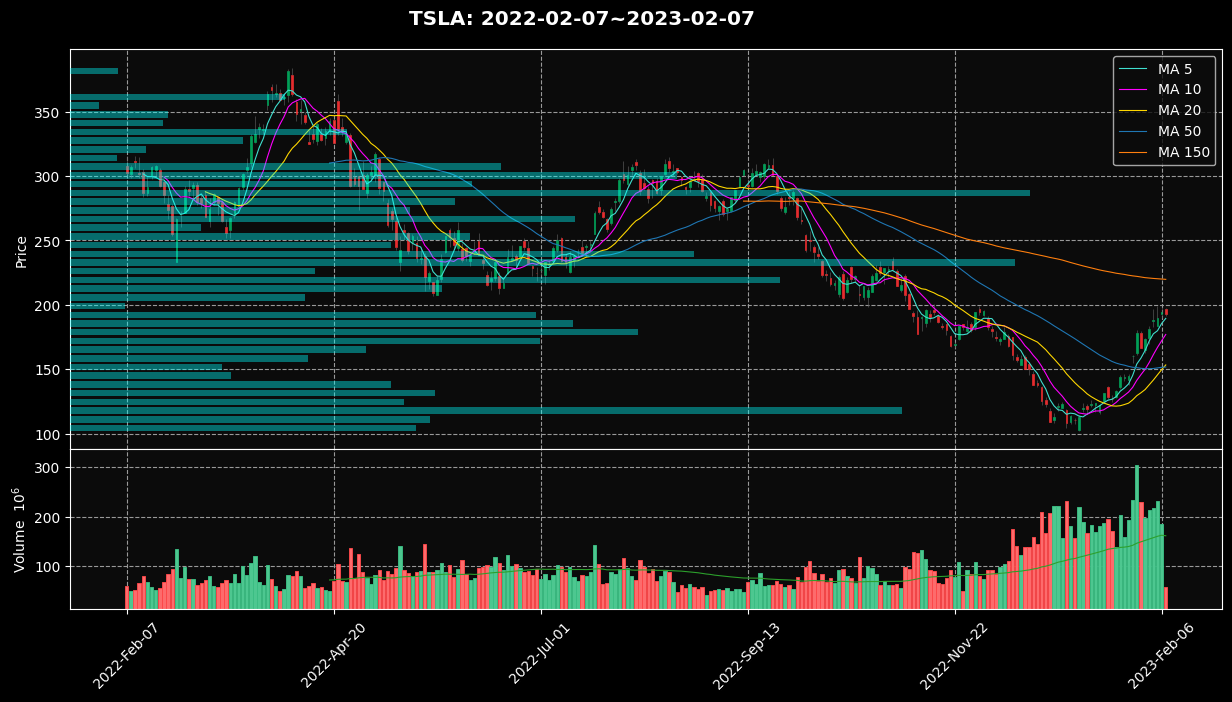

In [21]:
# -*- coding: utf-8 -*-
"""
Visualize a PBV (means price-by-volume, also called volume profile) for a given 
stock. Here the PBV is overlaid with the price subplot (total 2 subplots). 
"""
__software__ = "Volume Profile 2-split with mplfinace"
__version__ = "1.0"
__author__ = "York <york.jong@gmail.com>"
__date__ = "2023/02/02 (initial version) ~ 2023/02/06 (last revision)"

import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf


def show_pbv2s_mpl(ticker='TSLA', period='12mo', 
                   total_bins=42, 
                   ma_days=(5, 10, 20, 50, 150),
                   legend_loc='best'):
    """Visualize a PBV (means price-by-volume, also called volume profile) for a 
    given stock. Here the PBV overlaied with the price subplot. This figure 
    consists of two subplots: a price subplot and a volume subplot. The former 
    includes candlestick, moving average lines, while the latter includes 
    trading volume bar chart and volume moving average line.
 
    Parameters
    ----------
    ticker
        the ticker name (default is 'TSLA')
    period
        the period (default is '12mo' that means 12 monthes)
    total_bins
        the number of bins to calculate comulative volume for bins (default=42)
    ma_days
        a sequence to list days of moving averge lines
    legend_loc
        the location of the legend (default is 'best')
        Valid locations are
            best
            upper right
            upper left
            lower left
            lower right
            right
            center left
            center right
            lower center
            upper center
            center
    """
    # Download stock data 
    df = yf.Ticker(ticker).history(period=period)

    # Add Volume Moving Average
    vma = mpf.make_addplot(
        df['Volume'], mav=50, 
        type='line', linestyle='', 
        color='purple',
        panel=1)

    # Make a customized color style
    mc = mpf.make_marketcolors(base_mpf_style='yahoo')
    s = mpf.make_mpf_style(base_mpf_style='nightclouds', marketcolors=mc)

    # Plot candlesticks MA, volume, volume MA, RSI
    fig, axes = mpf.plot(
        df, type='candle', mav=ma_days,     # candlestick and MA 
        volume=True, addplot=[vma],         # volume, volume MA
        style=s, figsize=(16, 8),
        returnfig=True
    )
    axes[0].legend([f'MA {d}' for d in ma_days], loc=legend_loc)
    df.index = df.index.strftime('%Y-%m-%d')
    fig.suptitle(f"{ticker}: {df.index.values[0]}~{df.index.values[-1]}", 
                 y=0.93)

    # Volume Profile (i.e., Price by Volume)

    bin_size = (max(df['High']) - min(df['Low'])) / total_bins 
    bin_round = lambda x: bin_size * round(x / bin_size)
    bin = df['Volume'].groupby(df['Close'].apply(lambda x: bin_round(x))).sum()

    ax = fig.add_axes(axes[0].get_position())
    ax.set_axis_off()
    ax.set_xlim(right=1.2*max(bin.values))
    ax.barh(
        y=bin.keys(),       # price 
        width=bin.values,   # bin comulative volume
        height=0.75*bin_size,   
        align='center', 
        color='cyan', 
        alpha=0.4
    )

    # Show
    mpf.show()  # plt.show()


if __name__ == '__main__':
    #@title _
    ticker = "TSLA" #@param {type:"string"}
    period = "12mo" #@param ["3mo", "6mo", "12mo", "24mo"]
    total_bins = 42 #@param {type: "integer"}
    legend_loc = "best" #@param ["best", "upper right", "upper left", "lower left", "lower right", "right", "center left", "center right", "lower center", "upper center", "center"]
    show_pbv2s_mpl(ticker=ticker, period=period, 
                   total_bins=total_bins, legend_loc=legend_loc)

#### References:
* [Feature Request: Volume Profile on a chart with alpha argument](https://github.com/matplotlib/mplfinance/issues/162) -- Volume Profile (i.e., Price by Volume)
* [List of named colors](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)


## Plotly

### Show stock with only main subplot (using Plotly)


In [19]:
#@title _
ticker = "TSLA" #@param {type:"string"}
period = "12mo" #@param ["3mo", "6mo", "12mo", "24mo"]

"""
Show a single-subplot stock chart.
* Data from yfinance
* Plot with Plotly (for candlestick, MA, volume, volume MA) 
"""
import yfinance as yf
import pandas as pd
import plotly.graph_objs as go


# Download stock data
ticker = 'TSLA'
df = yf.Ticker(ticker).history(period=period)

# Add the candlestick chart
candlestick = go.Candlestick(
    x=df.index, 
    open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'], 
    name='OHLC'
)
fig = go.Figure(data=[candlestick])

# Add moving averages to the figure
ma_days = (10, 20, 50, 150)
ma_colors = ('red', 'green', 'blue', 'brown')
for d, c in zip(ma_days, ma_colors):
    df[f'ma{d}'] = df['Close'].rolling(window=d).mean()
    ma = go.Scatter(x=df.index, y=df[f'ma{d}'], name=f'MA {d}', 
                    line=dict(color=f'{c}', width=2))
    fig.add_trace(ma)

# Create separate y-axis for volume
volume = go.Bar(x=df.index, y=df['Volume'], name='Volume', yaxis='y2', 
                marker_color='orange', opacity=0.3)
fig.add_trace(volume)

# Add the volume moving average line
df['vma50'] = df['Volume'].rolling(window=50).mean()
vma50 = go.Scatter(x=df.index, y=df['vma50'], name='VMA50', yaxis='y2', 
                   line=dict(color='purple'))
fig.add_trace(vma50)

# Remove non-trading dates
df.index = df.index.strftime('%Y-%m-%d')
dt_all = pd.date_range(start=df.index.values[0], end=df.index.values[-1])
dt_all = [d.strftime("%Y-%m-%d") for d in dt_all]
trade_date = [d for d in df.index.values]
dt_breaks = list(set(dt_all) - set(trade_date))
fig.update_xaxes(rangebreaks=[dict(values=dt_breaks)])

# Update layout
fig.update_layout(
    xaxis_rangeslider_visible=False,

    title=f'{ticker}: {df.index.values[0]}~{df.index.values[-1]}', 
    title_x=0.5, title_y=.85,
    
    yaxis=dict(title='Price (USD)', side='right', overlaying='y2'),
    yaxis2=dict(title='Volume', side='left', showgrid=False),

    legend=dict(yanchor='middle', y=0.5, xanchor="left", x=0.01)
)

# Add crosshair cursor
fig.update_yaxes(
    spikemode='across', spikesnap='cursor', 
    spikethickness=1, spikedash='solid', spikecolor='grey')
fig.update_xaxes(
    spikemode='across', spikesnap='cursor',
    spikethickness=1, spikedash='solid', spikecolor='grey')
fig.update_layout(hovermode='x')  # 'x', 'y', 'closest', False, 'x unified', 'y unified'

# Show the figure
fig.show()

#### References:
* [绘制plotly金融股票图避坑指南——解决k线不连续问题](https://zhuanlan.zhihu.com/p/469985462)
* [Plotly How to move x-axis to top and y-axis to the right?](https://stackoverflow.com/questions/67590028/plotly-how-to-move-x-axis-to-top-and-y-axis-to-the-right)
* [Legends in Python](https://plotly.com/python/legend/)
* [Plotly: How to only show vertical and horizontal line (crosshair) as hoverinfo?](https://stackoverflow.com/questions/61794582/plotly-how-to-only-show-vertical-and-horizontal-line-crosshair-as-hoverinfo) -- show a acrossing cursor


### Show a 2-split (price, volume) stock chart (using Plotly)

In [18]:
#@title _ 
ticker = "TSLA" #@param {type:"string"}
period = "12mo" #@param ["3mo", "6mo", "12mo", "24mo"]

"""
Show a 2-split (price, volume) stock chart.
* Data from yfinance
* Plot with Plotly (for candlestick, MA, volume, volume MA) 
"""
import yfinance as yf
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots


# Download stock data
df = yf.Ticker(ticker).history(period=period)

# Initialize empty plot with a marginal subplot
fig = make_subplots(
    rows=2, cols=1, 
    row_heights=[0.7, 0.3],
    #shared_xaxes=True, 
    vertical_spacing=0.03, 
    figure=go.Figure(layout=go.Layout(height=720))
)
#print(fig)

# Plot the candlestick chart
candlestick = go.Candlestick(
    x=df.index, 
    open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'], 
    name='OHLC'
)
fig.add_trace(candlestick)

# Add moving averages to the figure
ma_days = (5, 10, 20, 50, 150)
ma_colors = ('orange', 'red', 'green', 'blue', 'brown')
for d, c in zip(ma_days, ma_colors):
    df[f'ma{d}'] = df['Close'].rolling(window=d).mean()
    ma = go.Scatter(x=df.index, y=df[f'ma{d}'], name=f'MA {d}', 
                    line=dict(color=f'{c}', width=2), opacity=0.4)
    fig.add_trace(ma)

# Add volume trace to 2nd row
colors = ['green' if o - c >= 0
          else 'red' for o, c in zip(df['Open'], df['Close'])]
volume = go.Bar(x=df.index, y=df['Volume'], name='Volume', 
                marker_color=colors, opacity=0.5)
fig.add_trace(volume, row=2, col=1)

# Add moving average volume to 2nd row
df['vma50'] = df['Volume'].rolling(window=50).mean()
vma50 = go.Scatter(x=df.index, y=df['vma50'], name='VMA 50', 
                   line=dict(color='purple', width=2))
fig.add_trace(vma50, row=2, col=1)

# Remove non-trading dates
df.index = df.index.strftime('%Y-%m-%d')
dt_all = pd.date_range(start=df.index.values[0], end=df.index.values[-1])
dt_all = [d.strftime("%Y-%m-%d") for d in dt_all]
trade_date = [d for d in df.index.values]
dt_breaks = list(set(dt_all) - set(trade_date))
fig.update_xaxes(rangebreaks=[dict(values=dt_breaks)])

# Update layout
fig.update_layout(
    title=f'{ticker}: {df.index.values[0]}~{df.index.values[-1]}', 
    title_x=0.5, title_y=.9,
    
    xaxis=dict(anchor='free'),
    yaxis=dict(anchor='x2', side='right', title='Price (USD)'),  
    yaxis2=dict(anchor='x', side='right', title='Volume'),

    legend=dict(yanchor='middle', y=0.5, xanchor="left", x=0.01),
    xaxis_rangeslider_visible=False,
)

# Add crosshair cursor
fig.update_yaxes(
    spikemode='across', spikesnap='cursor', 
    spikethickness=1, spikedash='solid', spikecolor='grey')
fig.update_xaxes(
    spikemode='across', spikesnap='cursor',
    spikethickness=1, spikedash='solid', spikecolor='grey')
fig.update_layout(hovermode='x')  # 'x', 'y', 'closest', False, 'x unified', 
                                  # 'y unified'

# Show the figure
fig.show()


#### References:
* [Plotly: How to add volume to a candlestick chart](https://stackoverflow.com/questions/64689342/plotly-how-to-add-volume-to-a-candlestick-chart)
* [Plotly: How to apply different titles for each different subplots?](https://stackoverflow.com/questions/58849925/plotly-how-to-apply-different-titles-for-each-different-subplots)
* [Formatting Ticks in Python](https://plotly.com/python/tick-formatting/)


### Show a stock Volume Profile (4 split; using Plotly)

In [22]:
# -*- coding: utf-8 -*-
"""
Visualize a PBV (means price-by-volume, also called volume profile) for a given 
stock. Here the PBV occupies a split of a 4-split chart. 
"""
__software__ = "Volume Profile 4-split with Plotly"
__version__ = "1.02"
__author__ = "York <york.jong@gmail.com>"
__date__ = "2023/02/02 (initial version) ~ 2023/02/07 (last revision)"

import yfinance as yf
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots


def show_pbv4s_plotly(ticker='TSLA', period='12mo', total_bins=42):
    """Visualize a PBV (means price-by-volume, also called volume profile) for a 
    given stock. Here the PBV occupies a split of a 4-split chart. This chart 
    also includes candlestick, MA lines, volume, and volume MA line. 
 
    Parameters
    ----------
    ticker
        the ticker name (default is 'TSLA')
    period
        the period (default is '12mo' that means 12 monthes)
    total_bins
        the number of bins to calculate comulative volume for bins.
    """
    # Download stock data
    df = yf.Ticker(ticker).history(period=period)

    # Initialize empty plot with marginal subplots
    fig = make_subplots(
        rows=2,
        cols=2,
        column_width=[0.75, 0.25],
        row_heights=[0.7, 0.3],
        #shared_xaxes="columns",
        #shared_yaxes="rows",
        #subplot_titles=["Price", "Price Bins", "Volume", ""]
        horizontal_spacing=0.01,
        vertical_spacing=0.03,
        figure=go.Figure(layout=go.Layout(width=1280, height=720))
    )
    #print(fig)

    # Plot the candlestick chart
    candlestick = go.Candlestick(
        x=df.index, 
        open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'], 
        name='OHLC',
    )
    fig.add_trace(candlestick, row=1, col=1)

    # Add moving averages to the figure
    ma_days = (5, 10, 20, 50, 150)
    ma_colors = ('orange', 'red', 'green', 'blue', 'brown')
    for d, c in zip(ma_days, ma_colors):
        df[f'ma{d}'] = df['Close'].rolling(window=d).mean()
        ma = go.Scatter(x=df.index, y=df[f'ma{d}'], name=f'MA {d}', 
                        line=dict(color=f'{c}', width=2), opacity=0.5)
        fig.add_trace(ma, row=1, col=1)

    # Add volume trace to 2nd row
    colors = ['green' if o - c >= 0
            else 'red' for o, c in zip(df['Open'], df['Close'])]
    volume = go.Bar(x=df.index, y=df['Volume'], name='Volume', 
                    marker_color=colors)
    fig.add_trace(volume, row=2, col=1)

    # Add moving average volume to 2nd row
    df['vma50'] = df['Volume'].rolling(window=50).mean()
    vma50 = go.Scatter(x=df.index, y=df['vma50'], name='VMA 50', 
                    line=dict(color='purple', width=2))
    fig.add_trace(vma50, row=2, col=1)

    # Add Price by Volume (Volume Profile) chart
    bin_size = (max(df['High']) - min(df['Low'])) / total_bins 
    bin_round = lambda x: bin_size * round(x / bin_size)
    bin = df['Volume'].groupby(df['Close'].apply(lambda x: bin_round(x))).sum()
    fig.add_trace(
        go.Bar(
            y=bin.keys(),   # Price
            x=bin.values,   # Bin Comulative Volume
            text=bin,       # (price, volume) pairs
            name="Price Bins",
            orientation="h",    # 'v', 'h'
            marker_color="brown",
            texttemplate="%{x/1000:3.2fK}",
            hoverinfo="y",   # 'x', 'y', 'x+y'
            opacity=0.5
        ),
        row=1, col=2
    )

    # Remove non-trading dates
    df.index = df.index.strftime('%Y-%m-%d')
    dt_all = pd.date_range(start=df.index.values[0], end=df.index.values[-1])
    dt_all = [d.strftime("%Y-%m-%d") for d in dt_all]
    trade_date = [d for d in df.index.values]
    dt_breaks = list(set(dt_all) - set(trade_date))
    fig.update_xaxes(rangebreaks=[dict(values=dt_breaks)])

    # Update layout
    fig.update_layout(
        title=f'{ticker}: {df.index.values[0]}~{df.index.values[-1]}', 
        title_x=0.5, title_y=.9,
        
        xaxis=dict(anchor='free'),  
        yaxis=dict(anchor='x3', side='left', title='Price (USD)'),  
        
        xaxis2=dict(title='Bin Comulative Volume'),  
        yaxis2=dict(side='right', title='Price (USD)'),  
        
        yaxis3=dict(side='left', title='Volume'),

        legend=dict(yanchor='middle', y=0.5, xanchor="left", x=0.01),
        xaxis_rangeslider_visible=False,
    )

    # Add crosshair cursor
    fig.update_yaxes(
        spikemode='across', spikesnap='cursor', 
        spikethickness=1, spikedash='solid', spikecolor='grey')
    fig.update_xaxes(
        spikemode='across', spikesnap='cursor',
        spikethickness=1, spikedash='solid', spikecolor='grey')
    fig.update_layout(hovermode='x')  # 'x', 'y', 'closest', False, 'x unified', 
                                      # 'y unified'

    # Show the figure
    fig.show()


if __name__ == '__main__':
    #@title _
    ticker = "TSLA" #@param {type:"string"}
    period = "12mo" #@param ["3mo", "6mo", "12mo", "24mo"]
    total_bins = 42 #@param {type: "integer"}
    show_pbv4s_plotly(ticker=ticker, period=period, total_bins=total_bins)

#### References:
* [Advanced Tips for Candlestick Plots in Python](https://medium.com/@lucasjamar47/advanced-tips-for-candlestick-plots-in-python-66977793bee) -- Volume Profile (i.e., Price by Volume)
* [Raindrop Charts in Python in 5 steps.](https://medium.com/@lucasjamar47/raindrop-charts-in-python-in-5-steps-d0a24f7cd090)


### Show a stock Volume Profile (2 split; using Plotly)


In [23]:
"""
Visualize a PBV (means price-by-volume, also called volume profile) for a given 
stock. Here the PBV is overlaid with the price subplot (total 2 subplots). 
"""
__software__ = "Volume Profile 2-split with Plotly"
__version__ = "1.01"
__author__ = "York <york.jong@gmail.com>"
__date__ = "2023/02/06 (initial version) ~ 2023/02/07 (last revision)"

import yfinance as yf
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots


def show_pbv2s_plotly(ticker='TSLA', period='12mo', total_bins=42):
    """Visualize a PBV (means price-by-volume, also called volume profile) for a 
    given stock. Here the PBV overlaied with the price subplot. This figure 
    consists of two subplots: a price subplot and a volume subplot. The former 
    includes candlestick, moving average lines, while the latter includes 
    trading volume bar chart and volume moving average line.
 
    Parameters
    ----------
    ticker
        the ticker name (default is 'TSLA')
    period
        the period (default is '12mo' that means 12 monthes)
    total_bins
        the number of bins to calculate comulative volume for bins.
    """
    # Download stock data
    df = yf.Ticker(ticker).history(period=period)
    
    # Initialize empty plot with a marginal subplot
    fig = make_subplots(
        rows=2, cols=1, 
        row_heights=[0.7, 0.3],
        #shared_xaxes=True, 
        vertical_spacing=0.03,
        specs=[
            [{"secondary_y": True}],    # row 1, col 1
            [{"secondary_y": False}]    # row 2, col 1
        ],
        figure=go.Figure(layout=go.Layout(height=720))
    )
    #print(fig)
    
    # Plot the candlestick chart
    candlestick = go.Candlestick(
        x=df.index, 
        open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'], 
        name='OHLC',
        xaxis='x2', yaxis='y2',
    )
    fig.add_trace(candlestick)
    
    # Add moving averages to the figure
    ma_days = (5, 10, 20, 50, 150)
    ma_colors = ('orange', 'red', 'green', 'blue', 'brown')
    for d, c in zip(ma_days, ma_colors):
        df[f'ma{d}'] = df['Close'].rolling(window=d).mean()
        ma = go.Scatter(
            x=df.index, y=df[f'ma{d}'], name=f'MA {d}', 
            line=dict(color=f'{c}', width=2),
            xaxis='x2', yaxis='y2',
        )
        fig.add_trace(ma)
    
    # Add Price by Volume (Volume Profile) chart
    bin_size = (max(df['High']) - min(df['Low'])) / total_bins 
    bin_round = lambda x: bin_size * round(x / bin_size)
    bin = df['Volume'].groupby(df['Close'].apply(lambda x: bin_round(x))).sum()
    vp = go.Bar(
        y=bin.keys(),   # Price
        x=bin.values,   # Bin Comulative Volume
        text=bin,       # (price, volume) pairs
        name="Price Bins",
        orientation="h",    # 'v', 'h'
        marker_color="brown",
        texttemplate="%{x/1000:3.2fK}",
        hoverinfo="y",   # 'x', 'y', 'x+y'
        opacity=0.3,
        xaxis='x', yaxis='y',
    )
    fig.add_trace(vp)
    
    # Add volume trace to 2nd row
    colors = ['green' if o - c >= 0
            else 'red' for o, c in zip(df['Open'], df['Close'])]
    volume = go.Bar(
        x=df.index, y=df['Volume'], name='Volume', 
        marker_color=colors, opacity=0.7,
        #xaxis='x2', yaxis='y3',
    )
    fig.add_trace(volume, row=2, col=1)
    
    # Add moving average volume to 2nd row
    df['vma50'] = df['Volume'].rolling(window=50).mean()
    vma50 = go.Scatter(x=df.index, y=df['vma50'], name='VMA 50', 
                    line=dict(color='purple', width=2), 
                    #xaxis='x2', yaxis='y3'
            )
    fig.add_trace(vma50, row=2, col=1)
    
    # Remove non-trading dates
    df.index = df.index.strftime('%Y-%m-%d')
    dt_all = pd.date_range(start=df.index.values[0], end=df.index.values[-1])
    dt_all = [d.strftime("%Y-%m-%d") for d in dt_all]
    trade_date = [d for d in df.index.values]
    dt_breaks = list(set(dt_all) - set(trade_date))
    fig.update_xaxes(rangebreaks=[dict(values=dt_breaks)])
    
    # Update layout
    fig.update_layout(
        title=f'{ticker}: {df.index.values[0]}~{df.index.values[-1]}', 
        title_x=0.5, title_y=.98,
        
        xaxis=dict(side='top', title='Bin Comulative Volume'),  
        yaxis=dict(side='left', title='Bin Price (USD)'), 
        
        xaxis2=dict(overlaying='x', side='bottom', title='Date'),
        yaxis2=dict(side='right', title='Price (USD)'), 
        yaxis3=dict(side='right', title='Volume'),
    
        legend=dict(yanchor='middle', y=0.5, xanchor="left", x=0.01),
        xaxis_rangeslider_visible=False,
        xaxis2_rangeslider_visible=False,
    )
    
    # Add crosshair cursor
    fig.update_yaxes(
        spikemode='across', spikesnap='cursor', 
        spikethickness=1, spikedash='solid', spikecolor='grey')
    fig.update_xaxes(
        spikemode='across', spikesnap='cursor',
        spikethickness=1, spikedash='solid', spikecolor='grey')
    fig.update_layout(hovermode='x')  # 'x', 'y', 'closest', False, 'x unified', 
                                      # 'y unified'
    
    # Show the figure
    fig.show()


if __name__ == '__main__':
    ticker = "TSLA" #@param {type:"string"}
    period = "12mo" #@param ["3mo", "6mo", "12mo", "24mo"]
    total_bins = 42 #@param {type: "integer"}
    show_pbv2s_plotly(ticker=ticker, period=period, total_bins=total_bins)
    

#### References

Multiple Axes:
* [Multiple axes and subplots](https://maegul.gitbooks.io/resguides-plotly/content/content/plotting_locally_and_offline/python/multiple_axes_and_subplots.html)
* [Can Plotly support 2 x-axis and 2 y-axis in one graph?](https://community.plotly.com/t/can-plotly-support-2-x-axis-and-2-y-axis-in-one-graph/38303)
* [Python Plotly – How to add multiple Y-axes?](https://www.geeksforgeeks.org/python-plotly-how-to-add-multiple-y-axes/)

Overlaying:
* [What does overlaying parameter of layout.axis object of plotly mean?](https://stackoverflow.com/questions/62182445/what-does-overlaying-parameter-of-layout-axis-object-of-plotly-mean)


## Usage Examples

### Stocks

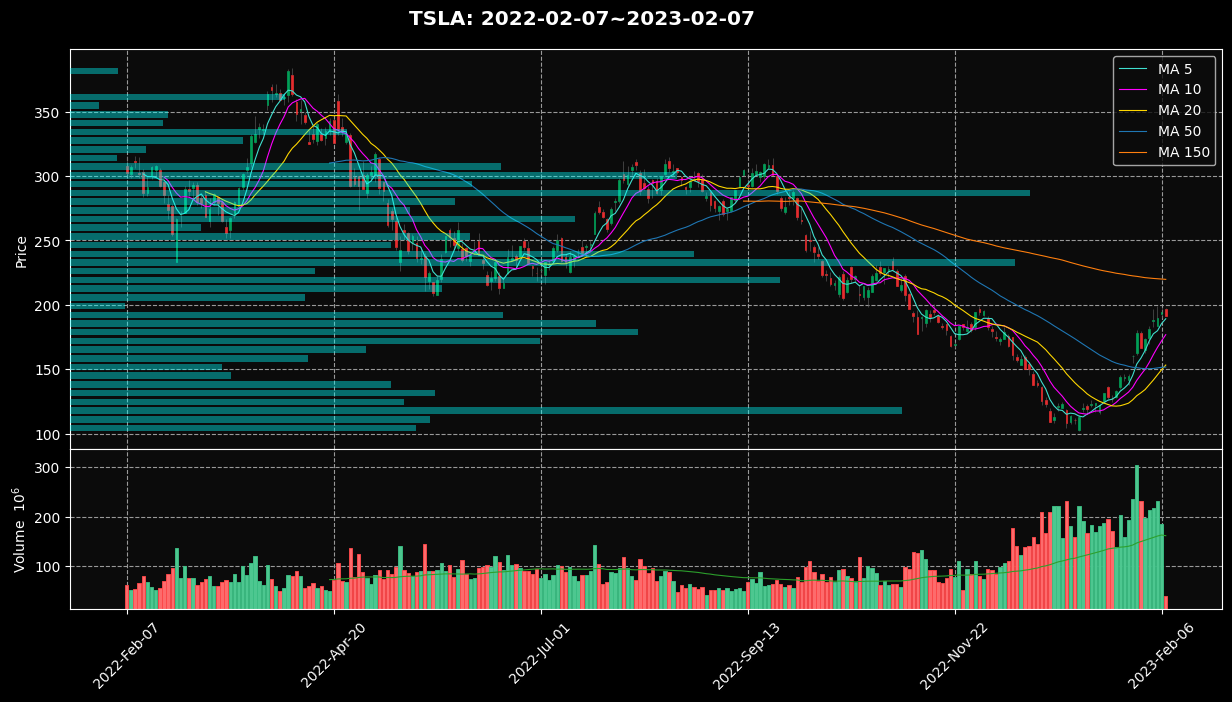

In [12]:
for ticker in ('TSLA', ):
    show_pbv2s_mpl(ticker, legend_loc='best')
    show_pbv2s_plotly(ticker)

### ETFs

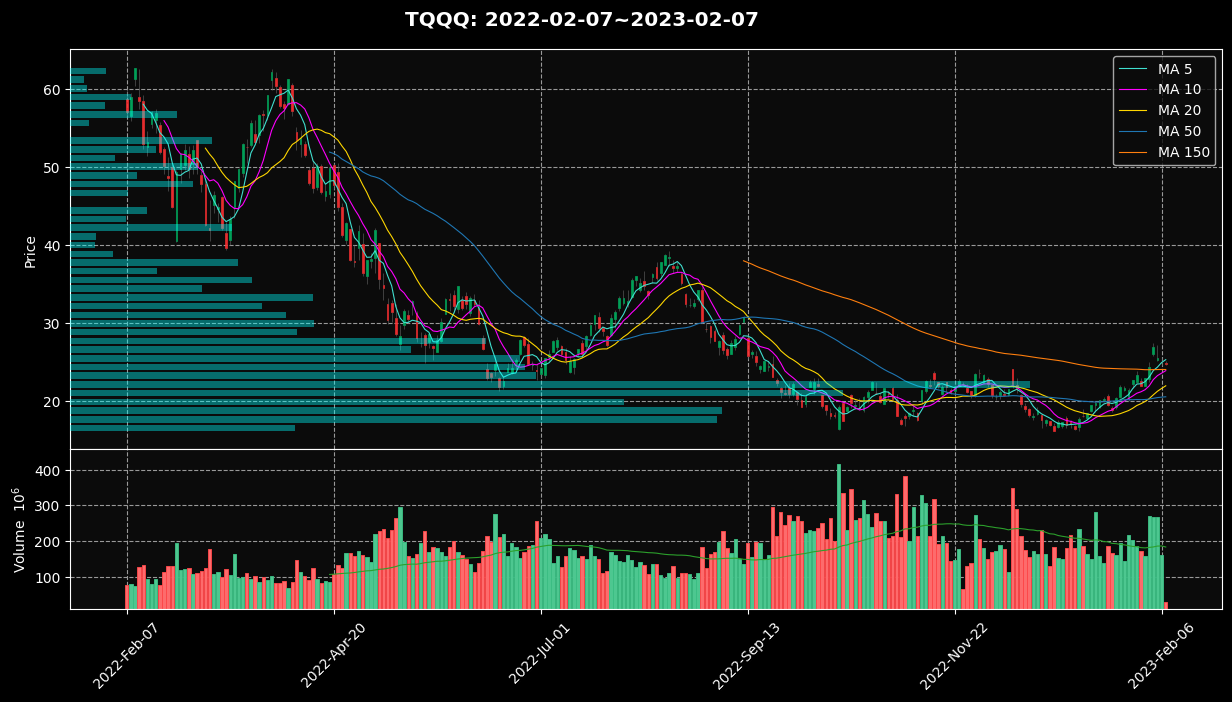

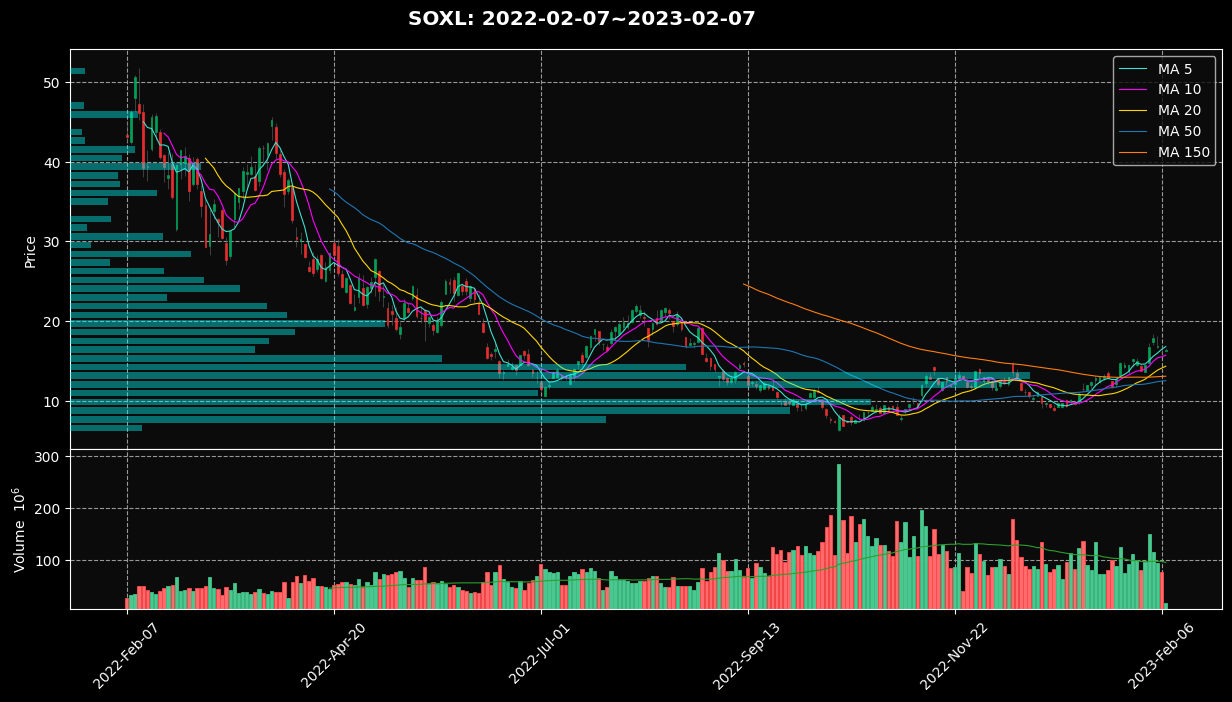

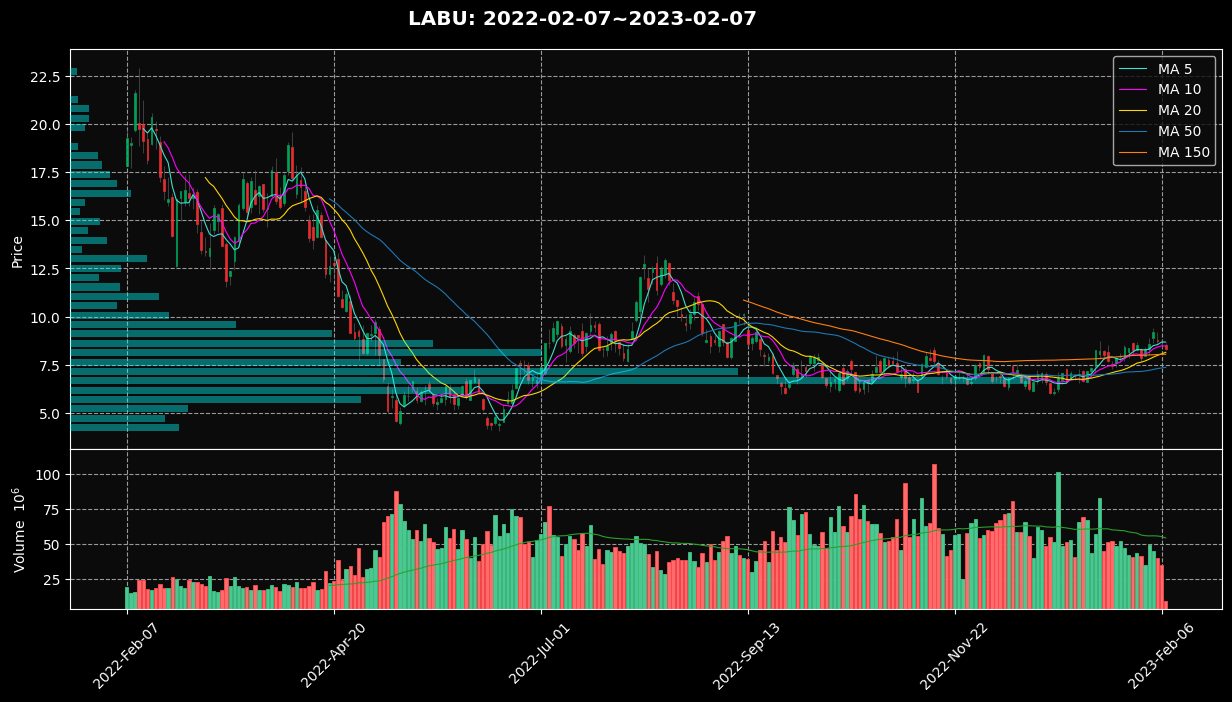

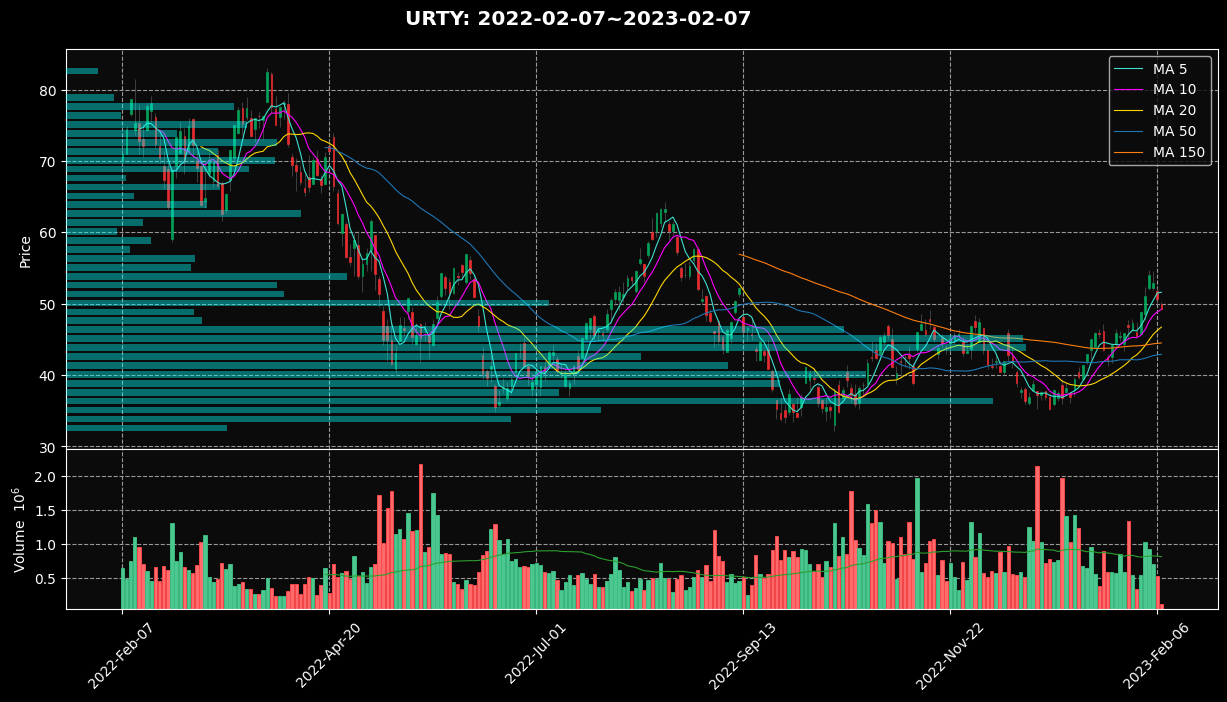

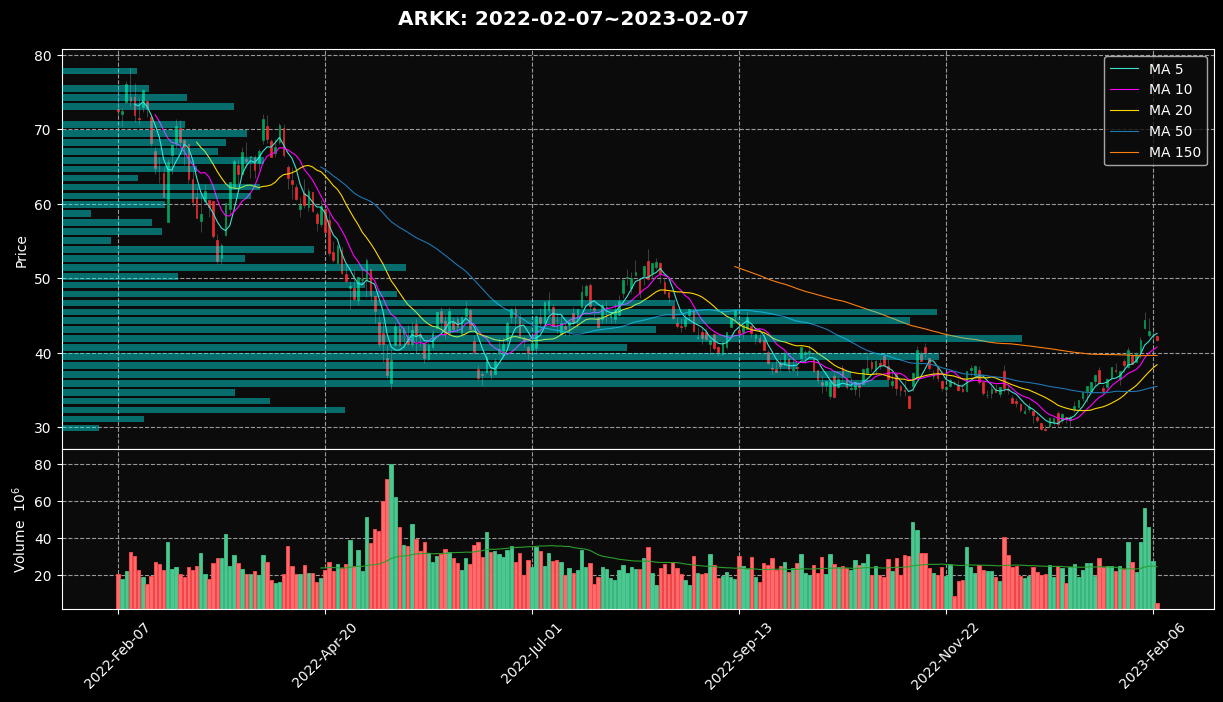

In [13]:
'''
Valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
'''
for ticker in ('TQQQ', 'SOXL', 'LABU', 'URTY', 'ARKK'):
	show_pbv2s_mpl(ticker, legend_loc='upper right')

### AI stocks

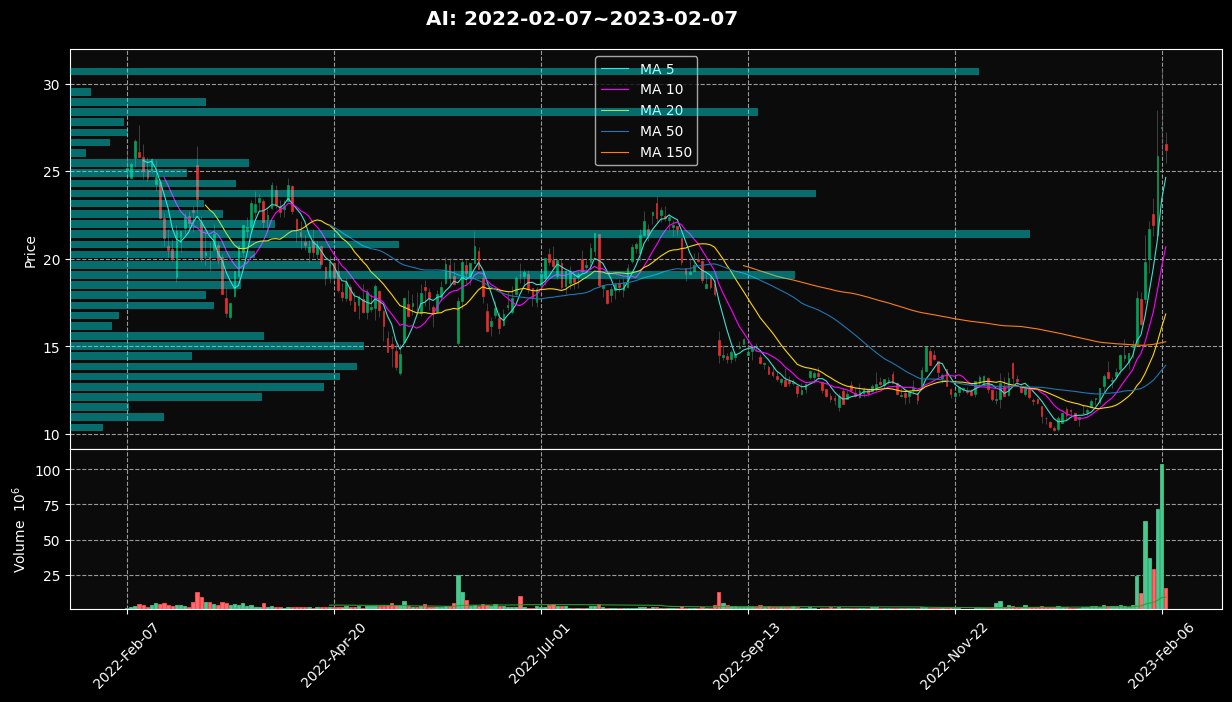

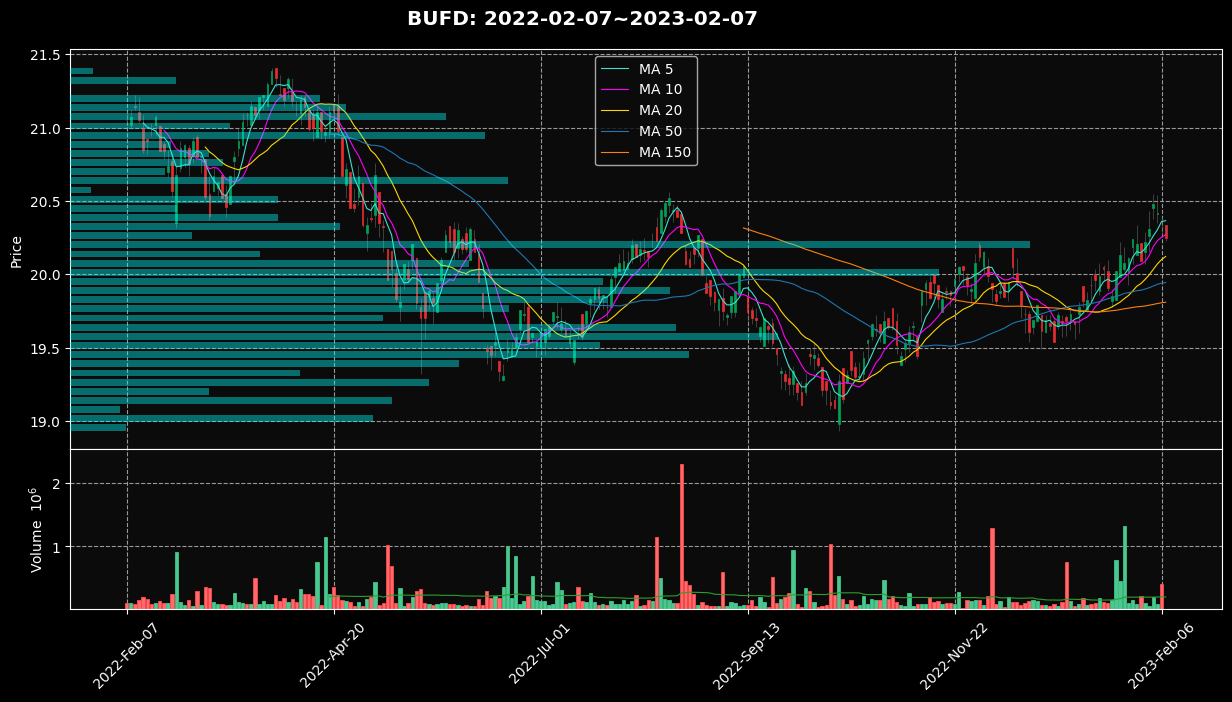

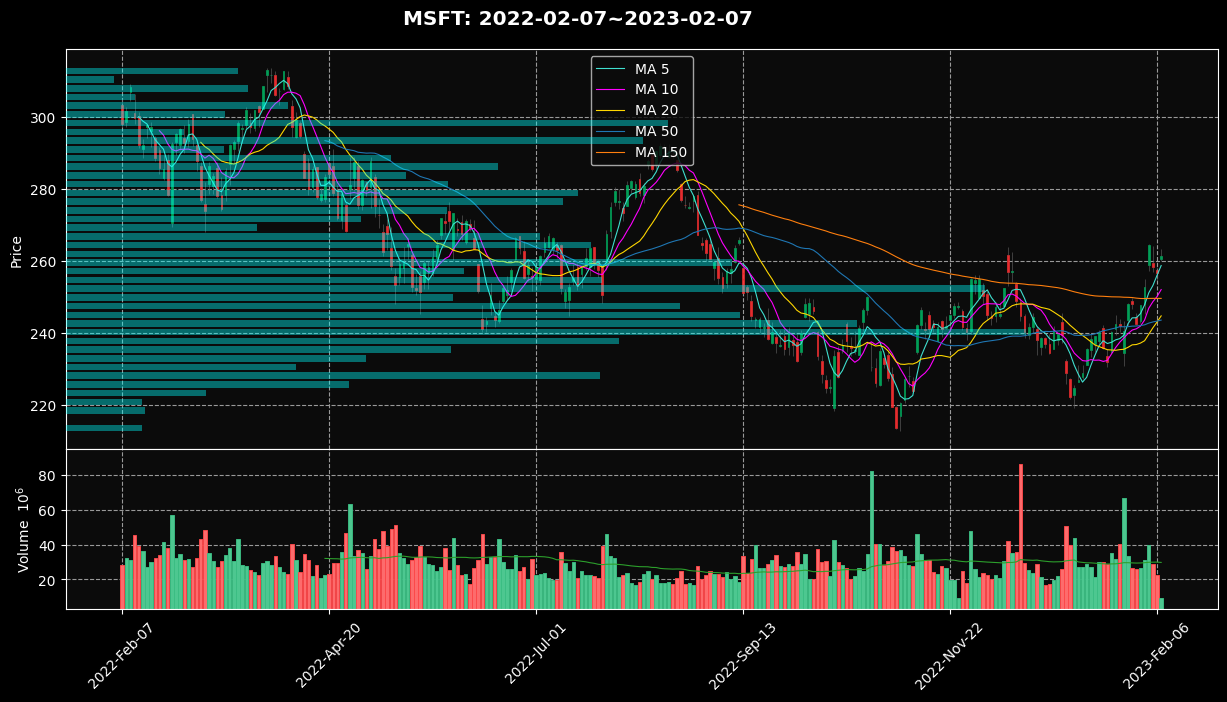

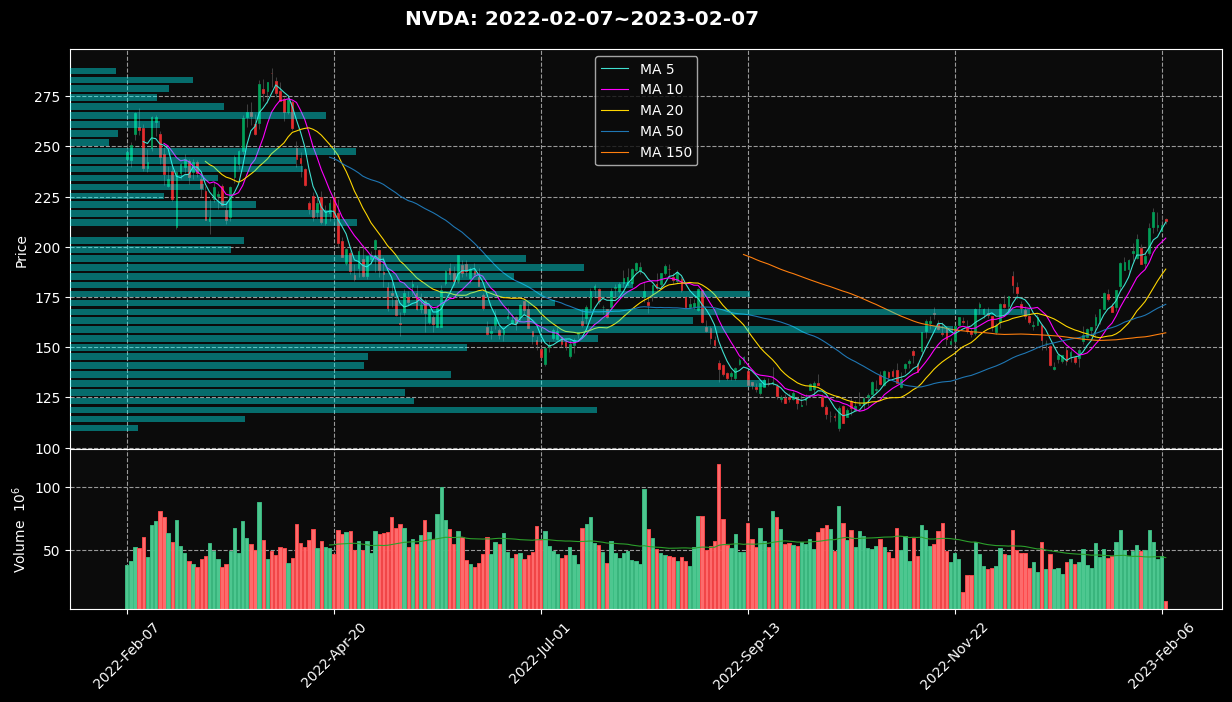

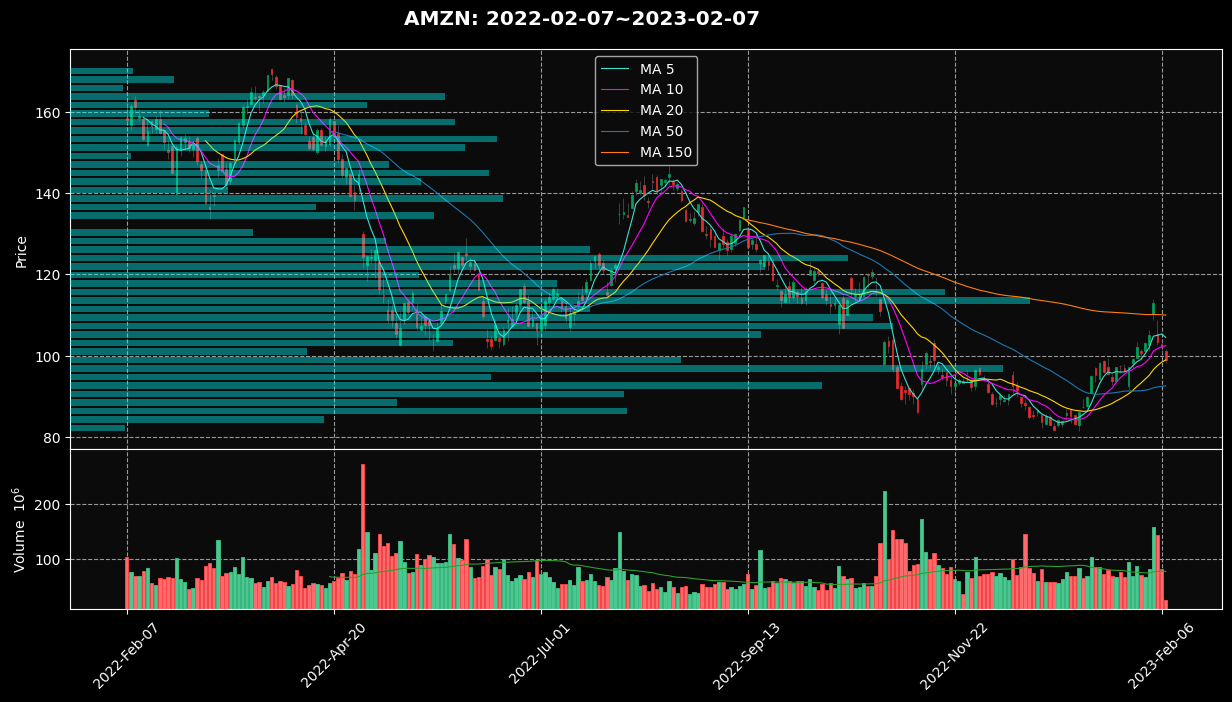

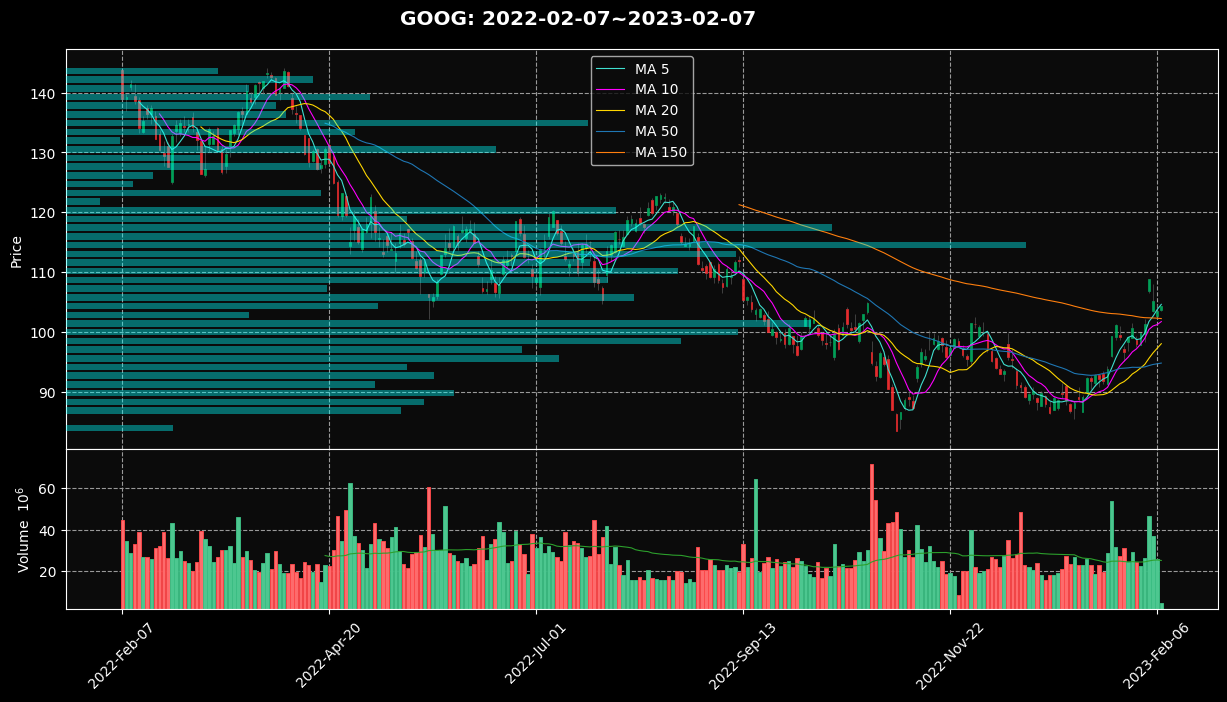

In [14]:
# AI
for ticker in ('AI', 'BUFD', 'MSFT', 'NVDA', 'AMZN', 'GOOG'):
    show_pbv2s_mpl(ticker, legend_loc='upper center')
